## File information

File: Assignment_5.2.ipynb

Name: Amie Davis

Date: 1/6/2021

Course: DSC650 - Big Data

Assignment Number: 5.2

Purpose: Implement the news classifier found in section 3.5 of Deep Learning with Python.

# Classifying newswires: a multi-class classification example
## This file contains code from Deep Learning with Python

www.manning.com/books/deep-learning-with-python

Copyright 2018 Francois Chollet

## Data Source: The Reuters dataset - comes packaged with Keras. 

In [2]:
import keras
keras.__version__

'2.3.1'

## Load the data

In [3]:
# Use Keras Reuters dataset for newswires and topics
# There are 46 separate topics
# Each topic has at least 10 examples in the training set.
# Split data into training & test datasets 
# Keep the top 10,000 most frequently occurring words

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
# Review Data

train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
# Review Labels
train_labels[10]

3

## Prepare the data

In [6]:
# Use one-hot-encoding to turn data into vectors of 0s and 1s
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.    # set specific indices of results[i] to 1s
    return results

# Vectorize training data
x_train = vectorize_sequences(train_data)

# Vectorize test data
x_test = vectorize_sequences(test_data)

In [7]:
# Review Vectorized Data
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
# Use one-hot-encoding on labels

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Vectorize training labels
one_hot_train_labels = to_one_hot(train_labels)

# Vectorize test labels
one_hot_test_labels = to_one_hot(test_labels)

## Build Keras Neural Network Model

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
# Define the model
from keras import models
from keras import layers

# input_shape is size of data vector
# 64 hidden layers (Must be greater than number of classes)
# Use softmax for output fxn since multi classification problem
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
# Compile Model

# Use categorical_crossentropy for multi classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validate Model

In [12]:
# Create Validation Set (set apart 1,000 samples)
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
# Train Model
# Collect measurement logs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 100us/step - loss: 2.7280 - accuracy: 0.5217 - val_loss: 1.8033 - val_accuracy: 0.6390
Epoch 2/20
7982/7982 [==============================] - 1s 82us/step - loss: 1.4828 - accuracy: 0.6966 - val_loss: 1.3606 - val_accuracy: 0.7130
Epoch 3/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.1000 - accuracy: 0.7633 - val_loss: 1.1703 - val_accuracy: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.8636 - accuracy: 0.8186 - val_loss: 1.1118 - val_accuracy: 0.7460
Epoch 5/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.6846 - accuracy: 0.8578 - val_loss: 0.9911 - val_accuracy: 0.7980
Epoch 6/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.5442 - accuracy: 0.8877 - val_loss: 0.9283 - val_accuracy: 0.8120
Epoch 7/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.4

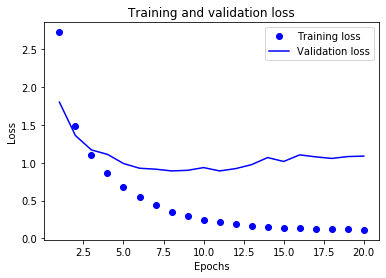

In [14]:
# Plot the training and validation loss 
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

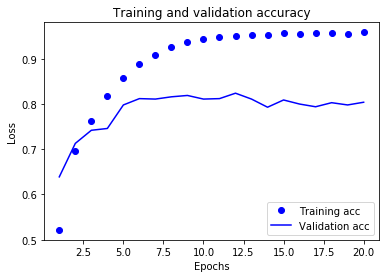

In [15]:
# Plot the training and validation accuracy
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Re-Train & Evaluate Model

In [16]:
# Re-train model based on plots
# Accuracy gets lower after 7.5 epochs
# Loss increases lower after 7.5 epochs
# Re-train with 8 epochs

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 93us/step - loss: 2.6350 - accuracy: 0.5044 - val_loss: 1.7732 - val_accuracy: 0.6340
Epoch 2/8
7982/7982 [==============================] - 1s 86us/step - loss: 1.4569 - accuracy: 0.7046 - val_loss: 1.3285 - val_accuracy: 0.7230
Epoch 3/8
7982/7982 [==============================] - 1s 81us/step - loss: 1.0759 - accuracy: 0.7735 - val_loss: 1.1609 - val_accuracy: 0.7390
Epoch 4/8
7982/7982 [==============================] - 1s 86us/step - loss: 0.8537 - accuracy: 0.8193 - val_loss: 1.0629 - val_accuracy: 0.7810
Epoch 5/8
7982/7982 [==============================] - 1s 86us/step - loss: 0.6859 - accuracy: 0.8583 - val_loss: 0.9899 - val_accuracy: 0.8080
Epoch 6/8
7982/7982 [==============================] - 1s 81us/step - loss: 0.5509 - accuracy: 0.8893 - val_loss: 0.9825 - val_accuracy: 0.7950
Epoch 7/8
7982/7982 [==============================] - 1s 82us/step - loss: 0.4443 - acc

In [17]:
# Show Evaluation results
results

[1.001386606364195, 0.7849510312080383]

Achieves an accuracy of ~78%. 

##  Use Model to Generate predictions

In [19]:
# Show predictions as vector of length 46 (number of classes) that total 1 (100%)
# Each entry is probability of that class
predictions = model.predict(x_test)

In [20]:
# The largest entry is the predicted class, i.e. the class with the highest probability:
np.argmax(predictions[0])

3